# Logistic Regression

### Hypothesis
$$ h_{\theta}(x_i) = g(z_i) $$
where,
$$ g(z_i) = \frac{1}{1 + e^{-z_i}} $$
and,
$$ z_i = \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + ... + \theta_n x_{in} $$

### Cost Function
$$ J(h_{\theta}(x_i)) = -y \log(h_{\theta}(x_i)) - (1-y) \log(1 - h_{\theta}(x_i)) $$

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("Practice\Machine Learning\machine-learning-ex2\machine-learning-ex2\ex2\ex2data1.txt", sep=',', header=None)
data.columns = ['Mid-Term', 'End-Term', 'Admitted']
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m, n = X.shape
X.head()

,Mid-Term,End-Term
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


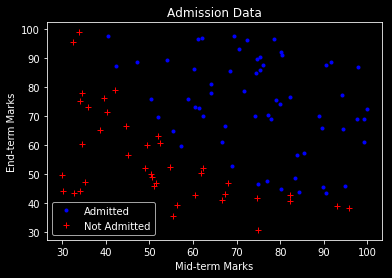

In [88]:
plt.figure()
plt.plot(X[y==1].iloc[:, 0], X[y==1].iloc[:, 1], 'b.', label='Admitted')
plt.plot(X[y==0].iloc[:, 0], X[y==0].iloc[:, 1], 'r+', label='Not Admitted')
plt.xlabel('Mid-term Marks')
plt.ylabel('End-term Marks')
plt.title('Admission Data')
plt.legend()
plt.show()

In [ ]:
i

In [89]:
def sigmoid(Z):
    return 1/(1+ 1/(np.e**Z))

In [90]:
def costFunc(theta, X, y):
    m = y.size
    y_ = y
    y = np.array(y)
    Z = X.dot(theta)
    H = sigmoid(Z)
    # print(H)
    cost = 1/m*(-1 * y.T.dot(np.log(H)) - (1-y).T.dot(np.log(1-H)) )
    return cost


In [91]:
def gradFunc(theta, X, y):
    Z = X.dot(theta)
    H = sigmoid(Z)
    return 1/(y.size)* X.T.dot(H-y)

In [92]:
X.insert(0, 'x_0', 1.0)

In [93]:
# initial_theta = np.array([0, 0, 0])
initial_theta = np.zeros(3)
cost = costFunc(initial_theta ,X, y)
print(cost)

0.6931471805599453


In [94]:
test_theta = np.array([-24, 0.2, 0.2])
cost = costFunc(test_theta, X, y)
grad = gradFunc(test_theta, X, y)
print(cost)
print(grad)

0.21833019382659785
x_0         0.042903
Mid-Term    2.566234
End-Term    2.646797
dtype: float64


In [98]:
import scipy.optimize as op
res = op.fmin_bfgs(f=costFunc, x0=initial_theta, fprime=gradFunc, args=(X,y))
print(res)

C:\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
[-25.16133284   0.2062317    0.2014716 ]


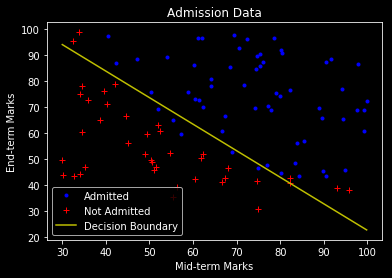

In [100]:
# Plotting decision boundary
x1 = np.array( [X.min()['Mid-Term'] , X.max()['Mid-Term']] )
x2 = -1*(res[0]+ res[1]*x1)/res[2]

plt.figure()
plt.plot(X[y==1].iloc[:, 1], X[y==1].iloc[:, 2], 'b.', label='Admitted')
plt.plot(X[y==0].iloc[:, 1], X[y==0].iloc[:, 2], 'r+', label='Not Admitted')
plt.plot(x1, x2, 'y-', label='Decision Boundary')

plt.xlabel('Mid-term Marks')
plt.ylabel('End-term Marks')
plt.title('Admission Data')
plt.legend()
plt.show()